In [70]:
import pyodbc 
import pandas as pd
import matplotlib
import math
from easygui import *


vehiculos = pd.read_csv (r"D:\Python\pruebanv\vehicles.csv", sep=',')

In [71]:
print(vehiculos)

                id                                                url  \
0       7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1       7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2       7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3       7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4       7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
...            ...                                                ...   
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

                        region                         region_url  price  \
0                     prescott    https://presc

In [72]:
list(vehiculos)

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long',
 'posting_date']

In [4]:
ano = [vehiculos.year]

In [5]:
print(ano)

[0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
426875    2019.0
426876    2020.0
426877    2020.0
426878    2018.0
426879    2019.0
Name: year, Length: 426880, dtype: float64]


In [6]:
group = vehiculos.groupby(['year']).count()

In [7]:
print(group)

           id    url  region  region_url  price  manufacturer  model  \
year                                                                   
1900.0     12     12      12          12     12             5     12   
1901.0      3      3       3           3      3             0      3   
1902.0      1      1       1           1      1             0      1   
1903.0     12     12      12          12     12            12     12   
1905.0      1      1       1           1      1             1      1   
...       ...    ...     ...         ...    ...           ...    ...   
2018.0  36369  36369   36369       36369  36369         35825  36153   
2019.0  25375  25375   25375       25375  25375         24894  25209   
2020.0  19298  19298   19298       19298  19298         18917  19168   
2021.0   2396   2396    2396        2396   2396          2175   2383   
2022.0    133    133     133         133    133            92    124   

        condition  cylinders   fuel  ...  size   type  paint_co

In [8]:
contar = vehiculos['id'].count()

In [9]:
print(contar)

426880


In [10]:
contar = vehiculos[vehiculos['year']==2021].count()

In [11]:
print(contar.year)

2396


In [12]:
vehiculos.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [13]:
#vehiculos = vehiculos.replace(".0","", regex=True)

In [14]:
vehiculos['year']=vehiculos['year'].fillna(0).astype(int)

In [15]:
vehiculos['year'].value_counts(ascending=True)

1915        1
1943        1
1902        1
1905        1
1909        1
        ...  
2016    30434
2013    30794
2015    31538
2018    36369
2017    36420
Name: year, Length: 115, dtype: int64

In [16]:
vehiculos['year'].value_counts()

2017    36420
2018    36369
2015    31538
2013    30794
2016    30434
        ...  
1915        1
1909        1
1905        1
1902        1
1943        1
Name: year, Length: 115, dtype: int64

In [17]:
print(vehiculos['year'])

0            0
1            0
2            0
3            0
4            0
          ... 
426875    2019
426876    2020
426877    2020
426878    2018
426879    2019
Name: year, Length: 426880, dtype: int32


In [18]:
len(pd.unique(vehiculos['region']))

404

In [19]:
regiones = len(pd.unique(vehiculos['region']))

In [20]:
print(regiones)

404


In [21]:
#vehiculos.sort_values('region')
#vehiculos['region'].value_counts(ascending=True)
#vehiculos['region'].value_counts().sort_values()
#vehiculos['region'].value_counts(sort=False)
#vehiculos['region'].value_counts(normalize=True)
#vehiculos['region'].value_counts().sort_index(ascending=True)

In [22]:
vehiculos['region'].value_counts()

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
orlando                    2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

In [23]:
vehiculos['region'].value_counts().to_frame()

region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
orlando                    2983
...                         ...
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8

[404 rows x 1 columns]

<AxesSubplot:>

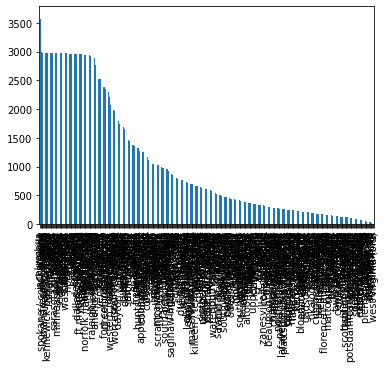

In [24]:
vehiculos['region'].value_counts().plot(kind='bar')

In [25]:
region = vehiculos.groupby('region')['id'].count()

In [26]:
print(region)

region
SF bay area               2936
abilene                    235
akron / canton            2211
albany                    2537
albuquerque               2952
                          ... 
york                       777
youngstown                 664
yuba-sutter               1747
yuma                       335
zanesville / cambridge     313
Name: id, Length: 404, dtype: int64


In [27]:
vehiculos['region'].str.contains('abilene').value_counts()[True]

235

In [28]:
region.to_csv(r'd:\region.csv')

In [29]:
region = vehiculos.nunique(axis=0)

In [30]:
print(region)

id              426880
url             426880
region             404
region_url         413
price            15655
year               115
manufacturer        42
model            29667
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118264
drive                3
size                 4
type                13
paint_color         12
image_url       241899
description     360911
county               0
state               51
lat              53181
long             53772
posting_date    381536
dtype: int64


In [31]:
vehiculosn = vehiculos.dropna()

In [32]:
print(vehiculosn)

Empty DataFrame
Columns: [id, url, region, region_url, price, year, manufacturer, model, condition, cylinders, fuel, odometer, title_status, transmission, VIN, drive, size, type, paint_color, image_url, description, county, state, lat, long, posting_date]
Index: []

[0 rows x 26 columns]


In [33]:
vehiculos['county'] = vehiculos['county'].fillna(99999)

In [34]:
vehiculos['county']

0         99999.0
1         99999.0
2         99999.0
3         99999.0
4         99999.0
           ...   
426875    99999.0
426876    99999.0
426877    99999.0
426878    99999.0
426879    99999.0
Name: county, Length: 426880, dtype: float64

In [35]:
vehiculosn = vehiculos.dropna()

In [36]:
print(vehiculosn)

                id                                                url  \
126     7305672709  https://auburn.craigslist.org/ctd/d/ozark-2018...   
127     7305672266  https://auburn.craigslist.org/ctd/d/ozark-2019...   
128     7305672252  https://auburn.craigslist.org/ctd/d/ozark-2018...   
215     7316482063  https://bham.craigslist.org/ctd/d/powder-sprin...   
219     7316429417  https://bham.craigslist.org/cto/d/birmingham-1...   
...            ...                                                ...   
426788  7303227528  https://wyoming.craigslist.org/ctd/d/billings-...   
426792  7303114896  https://wyoming.craigslist.org/ctd/d/cheyenne-...   
426793  7303112347  https://wyoming.craigslist.org/ctd/d/cheyenne-...   
426833  7302338378  https://wyoming.craigslist.org/cto/d/kirby-jag...   
426836  7302301268  https://wyoming.craigslist.org/ctd/d/dassel-20...   

            region                      region_url  price  year manufacturer  \
126         auburn   https://auburn.craigsl

In [37]:
vehiculosn.to_csv(r'd:\vehiculosn.csv')

In [38]:
len(pd.unique(vehiculosn['region']))

392

In [39]:
vehiculosn['condition'].value_counts().to_frame()

condition
excellent      19994
good           10122
like new        3932
fair             492
new              209
salvage           36

In [40]:
#vehiculosf = vehiculosn[(vehiculosn['condition'].str.contains('good')) & (vehiculosn['price'] >= 15000)]

In [41]:
vehiculosf = vehiculosn[((vehiculosn['condition'].str.contains('good')) |
                         (vehiculosn['condition'].str.contains('excellent'))) & (vehiculosn['price'] >= 15000)]

In [42]:
print(vehiculosf[['condition', 'price']])

        condition  price
346          good  98900
365          good  72900
366          good  28900
367          good  17000
535     excellent  45300
...           ...    ...
426782       good  23995
426783       good  15999
426784       good  24995
426792  excellent  32999
426793  excellent  15999

[11565 rows x 2 columns]


In [43]:
vehiculosf['condition'].value_counts().to_frame()

condition
excellent       7711
good            3854

In [44]:
vehiculosf.to_csv(r'd:\vehiculosf.csv')

In [45]:
vehiculosac = vehiculosn[(vehiculosn['manufacturer'].str.contains('chevrolet')) 
                         & (vehiculosn['paint_color'].str.contains('blue'))]

In [46]:
vehiculosac['manufacturer'].value_counts().to_frame()

manufacturer
chevrolet           498

In [69]:
vehiculosn['color'] = vehiculosn['paint_color'].apply(lambda x: 'blue' if x == 'black'  else 'red' if x == 'blue' else x )

<ipython-input-69-bbed66436fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vehiculosn['color'] = vehiculosn['paint_color'].apply(lambda x: 'blue' if x == 'black'  else 'red' if x == 'blue' else x )


In [ ]:
df1 = vehiculosn.groupby('paint_color').count().id

In [ ]:
print(df1)

In [ ]:
df2 = vehiculosn.groupby('color').count().id

In [ ]:
print(df2)

In [ ]:
vehiculosn[['paint_color', 'color']].count()

<AxesSubplot:xlabel='paint_color'>

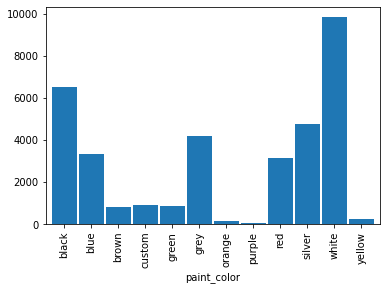

In [73]:
vehiculosn.groupby('paint_color').count()["id"].sort_index().plot(kind='bar',width=0.9)

<AxesSubplot:xlabel='color'>

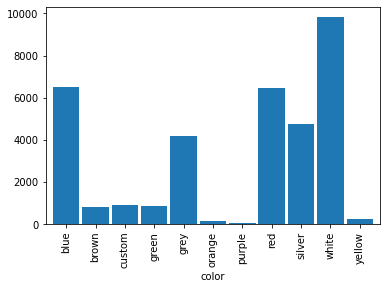

In [74]:
vehiculosn.groupby('color').count()["id"].sort_index().plot(kind='bar',width=0.9)

In [ ]:
c = x2.color.count()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

arr = [xx[0] for xx in x2]
x = np.arange(len(arr)) # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

ax.set_ylabel('Numero de vehículos')
ax.set_title('Colores')
ax.set_xticks(x)
ax.set_xticklabels(arr)

pps = ax.bar(x - width/2, c, width, label='x')
for p in pps:
   height = p.get_height()
   ax.annotate(f'{height}',
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

# plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
splot=sns.barplot(x="color",y="id",data=vehiculosn)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("color", size=14)
plt.ylabel("id", size=14)
plt.savefig("add_text_to_top_of_bars_in_barplot_Seaborn_Python.png")

In [62]:
list(vehiculosn)

['id',
 'url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'county',
 'state',
 'lat',
 'long',
 'posting_date',
 'der',
 'color']

In [ ]:
del vehiculosn['color']

In [ ]:
y = vehiculosn.groupby('paint_color')
y.color.count()

In [51]:

# import required libraries
import numpy as np
import pandas as pd
  
# create a Dataframe
Mydataframe = pd.DataFrame({'FirstName': ['Vipul',
                                          'Ashish',
                                          'Milan'],
                            "Age": [21,22,23]})
# show the dataframe
print("\n\n---Original Dataframe---\n", 
      Mydataframe)
  
# add an empty columns
Mydataframe['Gender'] = ''
Mydataframe['Department'] = np.nan
Mydataframe['otro'] = ''
  
# show the dataframe
print("---Updated Dataframe---\n", 
      Mydataframe)



---Original Dataframe---
   FirstName  Age
0     Vipul   21
1    Ashish   22
2     Milan   23
---Updated Dataframe---
   FirstName  Age Gender  Department otro
0     Vipul   21                NaN     
1    Ashish   22                NaN     
2     Milan   23                NaN     
